# Benchmark analysis
## Table of contents
1. [Reading the data](#Reading-the-data)
1. [Separating the catagories](#Separating-the-categories)
1. [Parties vs iterations category](#Parties_vs_iterations-category)
1. [Features category](#Features-category)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib ipympl

## Reading the data

In [2]:
df = pd.read_csv("results_seer_2024-03-05.txt")

#Filter unsuccesful run
df = df[df.comment!="Not enough features"]
display(df)

parameters_df = pd.read_csv("python/benchmark/benchmark_parameters.csv")

display(parameters_df)

,records,features,iterations,parties,preparation_runtime,convergence_runtime,mse,sad,mad,c_index_verticox,c_index_central,comment
0,100.0,6.0,100.0,2.0,5.665024,17.060291,2.421520e-01,1.530206,1.190805e+00,0.608026,0.621220,success
1,100.0,6.0,500.0,2.0,5.659040,54.826671,6.730218e-04,0.080342,6.280887e-02,0.621770,0.621220,success
2,100.0,6.0,1000.0,2.0,5.638839,103.655630,6.575379e-07,0.002510,1.963373e-03,0.621220,0.621220,success
3,100.0,6.0,1500.0,2.0,5.583305,139.597935,2.329109e-09,0.000152,1.164637e-04,0.621220,0.621220,success
4,100.0,6.0,2000.0,2.0,5.473467,164.415957,4.261583e-11,0.000020,1.573186e-05,0.621220,0.621220,success
5,100.0,6.0,100.0,3.0,6.416621,19.983673,1.181735e-01,1.050874,8.339453e-01,0.614623,0.621220,success
6,100.0,6.0,500.0,3.0,6.249583,66.409955,4.506793e-05,0.020446,1.629257e-02,0.621220,0.621220,success
7,100.0,6.0,1000.0,3.0,6.399600,114.775386,4.244136e-09,0.000199,1.580678e-04,0.621220,0.621220,success
8,100.0,6.0,1500.0,3.0,6.335524,137.900561,1.298903e-11,0.000011,8.698514e-06,0.621220,0.621220,success
9,100.0,6.0,2000.0,3.0,6.370075,157.489041,8.410007e-14,0.000001,5.621247e-07,0.621220,0.621220,success


,parties,iterations,records,features,category
0,2,100,100,6,parties_vs_iterations
1,2,500,100,6,parties_vs_iterations
2,2,1000,100,6,parties_vs_iterations
3,2,1500,100,6,parties_vs_iterations
4,2,2000,100,6,parties_vs_iterations
5,3,100,100,6,parties_vs_iterations
6,3,500,100,6,parties_vs_iterations
7,3,1000,100,6,parties_vs_iterations
8,3,1500,100,6,parties_vs_iterations
9,3,2000,100,6,parties_vs_iterations


## Separating the categories

In [3]:
labeled_df = df.join(parameters_df[["category"]])
labeled_df

,records,features,iterations,parties,preparation_runtime,convergence_runtime,mse,sad,mad,c_index_verticox,c_index_central,comment,category
0,100.0,6.0,100.0,2.0,5.665024,17.060291,2.421520e-01,1.530206,1.190805e+00,0.608026,0.621220,success,parties_vs_iterations
1,100.0,6.0,500.0,2.0,5.659040,54.826671,6.730218e-04,0.080342,6.280887e-02,0.621770,0.621220,success,parties_vs_iterations
2,100.0,6.0,1000.0,2.0,5.638839,103.655630,6.575379e-07,0.002510,1.963373e-03,0.621220,0.621220,success,parties_vs_iterations
3,100.0,6.0,1500.0,2.0,5.583305,139.597935,2.329109e-09,0.000152,1.164637e-04,0.621220,0.621220,success,parties_vs_iterations
4,100.0,6.0,2000.0,2.0,5.473467,164.415957,4.261583e-11,0.000020,1.573186e-05,0.621220,0.621220,success,parties_vs_iterations
5,100.0,6.0,100.0,3.0,6.416621,19.983673,1.181735e-01,1.050874,8.339453e-01,0.614623,0.621220,success,parties_vs_iterations
6,100.0,6.0,500.0,3.0,6.249583,66.409955,4.506793e-05,0.020446,1.629257e-02,0.621220,0.621220,success,parties_vs_iterations
7,100.0,6.0,1000.0,3.0,6.399600,114.775386,4.244136e-09,0.000199,1.580678e-04,0.621220,0.621220,success,parties_vs_iterations
8,100.0,6.0,1500.0,3.0,6.335524,137.900561,1.298903e-11,0.000011,8.698514e-06,0.621220,0.621220,success,parties_vs_iterations
9,100.0,6.0,2000.0,3.0,6.370075,157.489041,8.410007e-14,0.000001,5.621247e-07,0.621220,0.621220,success,parties_vs_iterations


## Parties_vs_iterations category

In [4]:
parties_vs_iterations = labeled_df[labeled_df.category == "parties_vs_iterations"]
parties_vs_iterations[["parties", "iterations", "preparation_runtime", "convergence_runtime", "mse", "sad", "mad", "c_index_verticox", "c_index_central"]]\
    .set_index(["parties", "iterations"])\
    .style.format("{:.4e}", subset=["mse", "sad", "mad"])\
    .format_index("{:.0f}")

### Plotting number of iterations vs. c-index

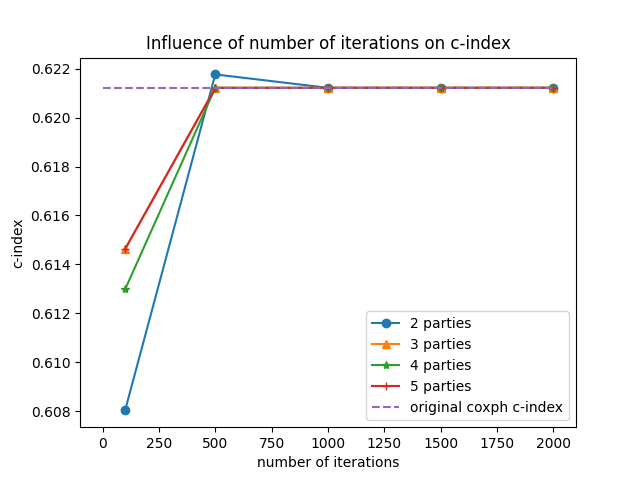

In [5]:
def plot_y_vs_iterations(y: str):
    """
    x axis: iterations
    y: axis: c_index of central (constant) and decentral (multiple points)
    shape/color: number of parties
    """

    linestyles = ["--", "-.", ":"]
    markers = ["o", "^", "*", "+"]

    fig, ax = plt.subplots()

    for idx, (parties, group) in enumerate(parties_vs_iterations.groupby("parties")):
        ax.plot(group["iterations"], group[y], linestyle="-", marker=markers[idx],
                label=f"{int(parties)} parties")
        
    return fig, ax
        
fig, ax = plot_y_vs_iterations("c_index_verticox")
        
central_x = [0, parties_vs_iterations["iterations"].max()]
central_y = [parties_vs_iterations["c_index_central"].iloc[0]]*2

ax.plot(central_x, central_y, label="original coxph c-index", linestyle="--")
ax.set_xlabel("number of iterations")
ax.set_ylabel("c-index")
ax.set_title("Influence of number of iterations on c-index")
plt.legend()

### Table

In [6]:
parties_vs_iterations[["parties", "iterations", "preparation_runtime", "convergence_runtime", "mse", "sad", "mad", "c_index_verticox", "c_index_central"]]\
    .set_index(["parties", "iterations"])\
    .style.format("{:.4e}", subset=["mse", "sad", "mad"])\
    .format_index("{:.0f}")

### Plotting MSE vs. parties and iterations

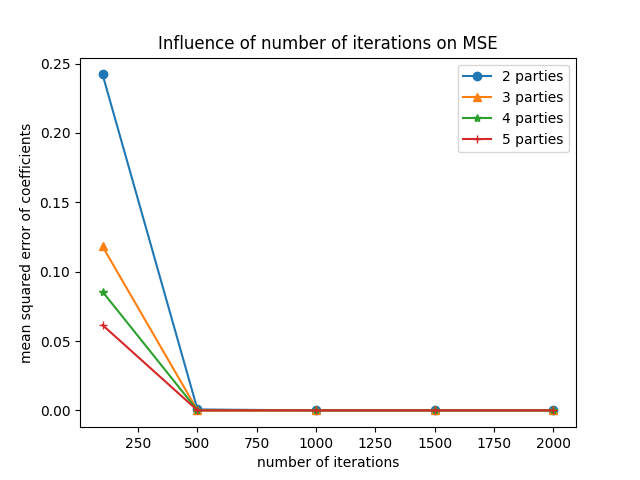

In [7]:
fig, ax = plot_y_vs_iterations("mse")

ax.set_xlabel("number of iterations")
ax.set_ylabel("mean squared error of coefficients")
ax.set_title("Influence of number of iterations on MSE")
plt.legend()

### Number of iterations & parties vs. runtime

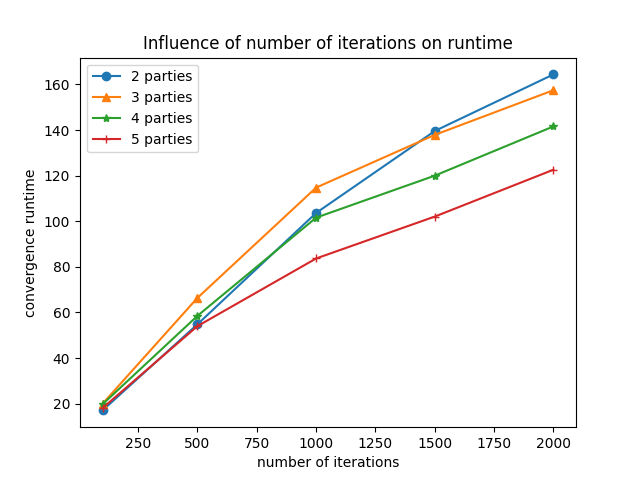

In [8]:
fig, ax = plot_y_vs_iterations("convergence_runtime")

ax.set_xlabel("number of iterations")
ax.set_ylabel("convergence runtime")
ax.set_title("Influence of number of iterations on runtime")
plt.legend()

## Features category
### Extract data

In [16]:
features_benchmark = labeled_df[labeled_df.category == "features"]
features_benchmark[["features", "preparation_runtime", "convergence_runtime"]].style\
.format("{:.0f}", subset=["features"])\
.hide()

features,preparation_runtime,convergence_runtime
4,5.952705,44.395199
6,6.215996,64.167521
8,6.435831,80.949848
10,6.905853,79.139138


## Plot features vs runtime

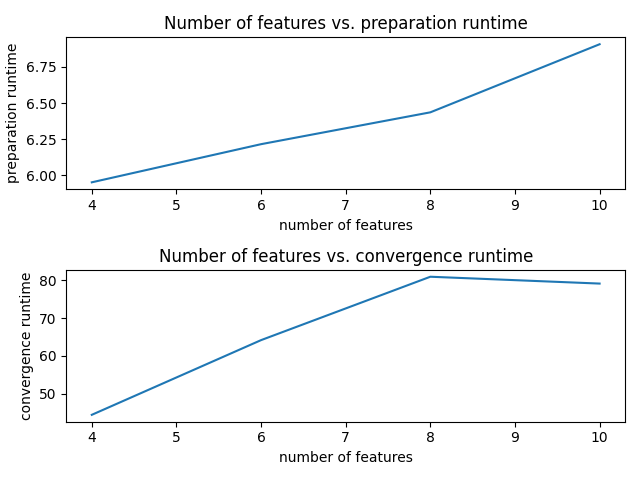

In [11]:
features = features_benchmark.features
preparation_runtime = features_benchmark.preparation_runtime
convergence_runtime = features_benchmark.convergence_runtime

fig, ax = plt.subplots(2)
ax[0].plot(features, preparation_runtime)
ax[0].set_xlabel("number of features")
ax[0].set_ylabel("preparation runtime")
ax[0].set_title("Number of features vs. preparation runtime")

ax[1].plot(features, convergence_runtime)
ax[1].set_xlabel("number of features")
ax[1].set_ylabel("convergence runtime")
ax[1].set_title("Number of features vs. convergence runtime")

plt.tight_layout()
plt.show()

## Records category

In [14]:
records_benchmark = labeled_df[labeled_df.category=="records"]
records_benchmark = records_benchmark[["records", "preparation_runtime", "convergence_runtime"]]
records_benchmark.style.format("{:.0f}", subset=["records"]).hide()

records,preparation_runtime,convergence_runtime
50,6.150900,63.908818
100,6.203719,63.985300
500,6.313849,60.225926
1000,6.452505,40.792568
